In [5]:
!pip install folium

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.10.2 requires ruamel-yaml, which is not installed.
jupyter-server 1.13.5 requires pywinpty<2; os_name == "nt", but you have pywinpty 2.0.2 which is incompatible.



  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [2]:
# Load the traffic accident dataset
df= pd.read_csv(r"C:\Users\indum\Downloads\US_Accidents_Dec21_updated.csv")

In [3]:
# Check for missing values and handle them if necessary
df.dropna(subset=['Start_Lat', 'Start_Lng', 'Start_Time', 'Weather_Condition'], inplace=True)

In [4]:
# Convert 'Start_Time' to datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

In [5]:
# Extract 'Hour' from 'Start_Time'
df['Hour'] = df['Start_Time'].dt.hour

In [7]:
# Simplify 'Weather_Condition' and 'Road_Condition' if necessary (assuming they are already meaningful)
df['Weather_Condition'] = df['Weather_Condition'].str.lower()
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Hour
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,Night,Night,Night,Night,0
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,Night,Night,Night,Night,5
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,Night,Night,Night,Day,6
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,Night,Night,Day,Day,6
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,Day,Day,Day,Day,7


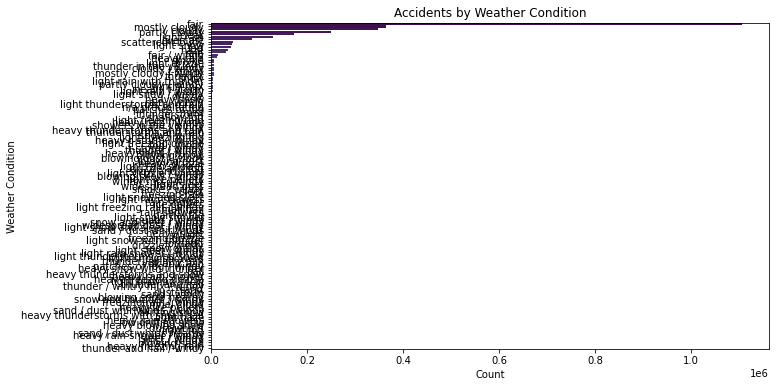

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Weather_Condition', data=df, palette='viridis', order=df['Weather_Condition'].value_counts().index)
plt.title('Accidents by Weather Condition')
plt.xlabel('Count')
plt.ylabel('Weather Condition')
plt.show()

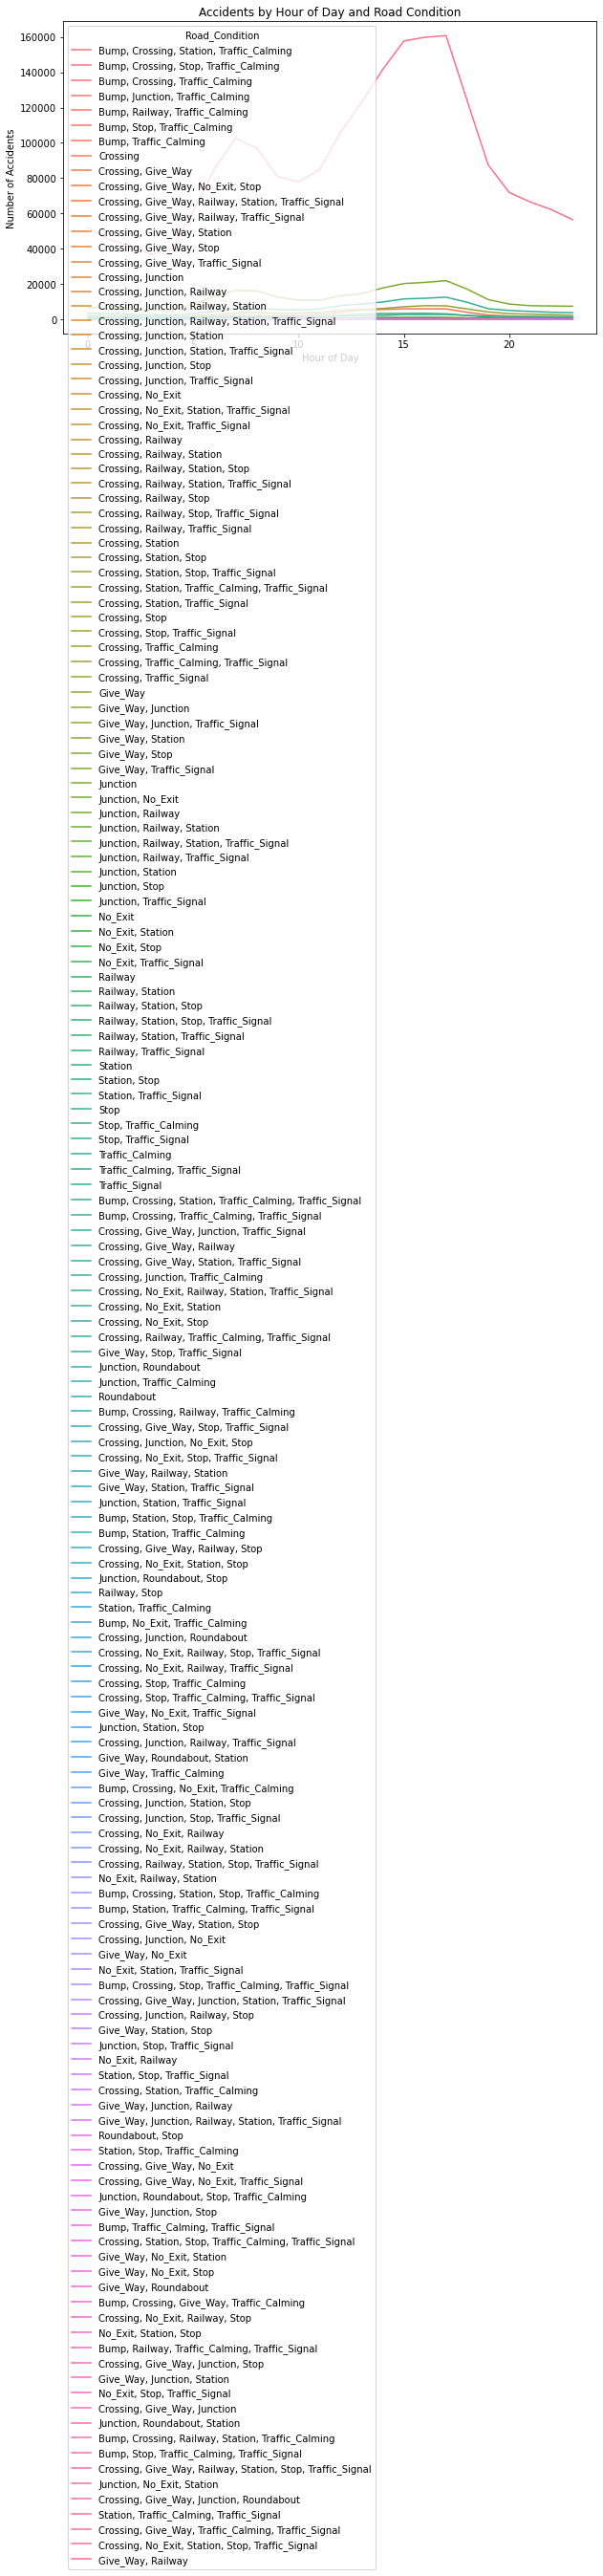

In [9]:
# Plot the number of accidents by hour of day and road condition
plt.figure(figsize=(10,6))
sns.lineplot(x='Hour', y='Count', hue='Road_Condition', data=hourly_accidents)
plt.title('Accidents by Hour of Day and Road Condition')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()

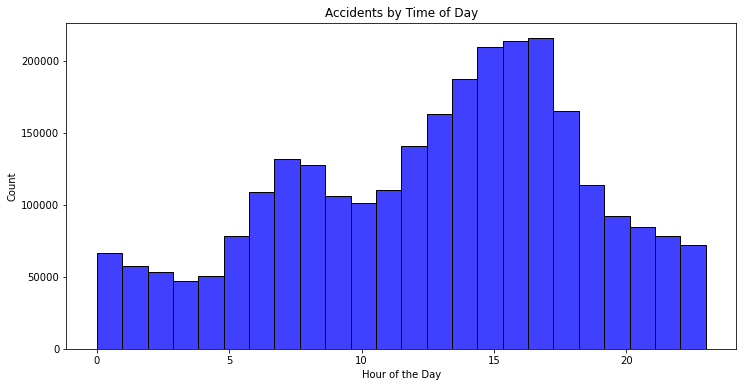

In [9]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Hour'], bins=24, kde=False, color='blue')
plt.title('Accidents by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.show()

In [10]:
# Group accidents by weather condition and road condition, and count the number of accidents
weather_accidents = accidents.groupby(['Weather_Condition_Cat', 'Road_Condition']).size().reset_index(name='Count')

In [10]:
# Create a base map
m = folium.Map(location=[df['Start_Lat'].mean(), df['Start_Lng'].mean()], zoom_start=12)

In [11]:
# Create a heatmap
heat_data = [[row['Start_Lat'], row['Start_Lng']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(m)

In [13]:
heat_data

[[40.10891, -83.09286],
 [39.86542, -84.0628],
 [39.10266, -84.52468],
 [41.06213, -81.53784],
 [39.172393, -84.49279200000002],
 [39.06324, -84.03243],
 [39.77565, -84.18603],
 [41.37531, -81.82016999999998],
 [40.702247, -84.075887],
 [40.10931, -82.96849],
 [39.19288, -84.47723],
 [39.13877, -84.53394],
 [41.4739, -81.704233],
 [39.582242, -83.677814],
 [40.151785, -81.312635],
 [40.151747, -81.312682],
 [39.97241, -82.84695],
 [39.9838, -82.85656999999998],
 [40.02664, -82.9944],
 [41.679361, -83.573037],
 [40.99613, -85.26613],
 [39.0381, -84.59243000000002],
 [40.03386, -82.99601],
 [39.85798, -84.28181],
 [39.15267, -84.5395],
 [39.30732, -85.95982],
 [39.77572, -84.04815],
 [39.97643, -83.12306],
 [39.58595, -85.82518],
 [39.3638, -85.51659000000002],
 [39.45132, -85.62516],
 [39.75067, -84.14148],
 [39.2675, -81.49929],
 [39.86025, -85.96623000000002],
 [41.95677, -83.67214],
 [38.27401, -85.74844],
 [41.95677, -83.67214],
 [40.52225, -80.06666],
 [40.487814, -80.009439],
 [40

In [12]:
# Save the map to an HTML file
m.save('accident_hotspots.html')